In [1]:
import readers
import functions
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from importlib import reload
#if is_changed(functions)

#### Execute the cell below to reload changes done in module functions without restarting the kernel

In [2]:
reload(functions)
#reload(readers)

<module 'functions' from 'G:\\UNI\\MSc\\GDP\\FULL_ROOM\\sum 2\\functions.py'>

# Parameter lists for every person (modify if necessary)

In [3]:
#Parameter lists
distance = ['2student','4student','2teacher','4teacher']                      #Adrián
renewalshour = [2,3,4,8]                                               #Vighnesh
roomtemp = [19,23,27]                                                  #Ronghao
exposuretime = ['60s','120s','240s','480s']                            #Yibing
masktype = ['wall','cotton','N95']                                     #Malo
maskNumber = ['one','all']                                             #Malo
ncoughpeople = ['back','back+teach','front+teach','sides+teach','all'] #Sócrates
caseAdri = 'distance'
caseVig = 'ventilation'
caseRong = 'temp'
caseYib = 'student'
caseMal = 'maskType'
caseMal2 = 'maskNumber'
caseSoc = 'npeople'
#For mixed build:
paramlist = [ncoughpeople,renewalshour,roomtemp,exposuretime,masktype,maskNumber,distance]
caseslist = [caseSoc,caseVig,caseRong,caseYib,caseMal,caseMal2,caseAdri]
overalldict = dict(zip(caseslist,paramlist))

### Build mixed dictionaries based on list mixedlist

In [4]:
mixedlist = ['wall','sides+teach',23,8]
timesmixdict = dict.fromkeys(mixedlist)
massmixdict = dict.fromkeys(mixedlist)
totalsmixdict = dict.fromkeys(mixedlist)
zonesmixdict = dict.fromkeys(mixedlist)
back = False
for elem in mixedlist:
    if elem == 'back' and back == False:
        back = True
    elif elem == 'back' and back == True:
        continue
    for casename,plist in overalldict.items():
        print(casename,plist,elem)
        if elem in plist:
            zn,td,md,totd = functions.build(casename,[elem])
            functions.matchallnames(td,md,zn,[elem])
            timesmixdict[elem] = td[elem]
            massmixdict[elem] = md[elem]
            totalsmixdict[elem] = totd[elem]
            zonesmixdict[elem] = zn[elem]
            break
        else:
            print(elem,' not found in mixeddict')

npeople ['back', 'back+teach', 'front+teach', 'sides+teach', 'all'] wall
wall  not found in mixeddict
ventilation [2, 3, 4, 8] wall
wall  not found in mixeddict
temp [19, 23, 27] wall
wall  not found in mixeddict
student ['60s', '120s', '240s', '480s'] wall
wall  not found in mixeddict
maskType ['wall', 'cotton', 'N95'] wall
start building...
building  wall
Read zones: maskType_wall.zones
Reading maskType_wall summaries
timesdict name substitution wall
massdict name substitution wall
npeople ['back', 'back+teach', 'front+teach', 'sides+teach', 'all'] sides+teach
start building...
building  sides+teach
Read zones: npeople_sides+teach.zones
Reading npeople_sides+teach summaries
timesdict name substitution sides+teach
massdict name substitution sides+teach
npeople ['back', 'back+teach', 'front+teach', 'sides+teach', 'all'] 23
23  not found in mixeddict
ventilation [2, 3, 4, 8] 23
23  not found in mixeddict
temp [19, 23, 27] 23
start building...
building  23
Read zones: temp_23.zones
Readi

finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished reading
finished readi

### Load data with your casename and your parameter

In [4]:
zones,timesdict,massdict,totalsdict = functions.build('distance',distance)
functions.matchallnames(timesdict,massdict,zones,distance)

start building...
building  2student
Read zones: distance_2student.zones
Reading distance_2student summaries
building  4student
Read zones: distance_4student.zones
Reading distance_4student summaries
building  2teacher
Read zones: distance_2teacher.zones
Reading distance_2teacher summaries
building  4teacher
Read zones: distance_4teacher.zones
Reading distance_4teacher summaries
timesdict name substitution 2student
massdict name substitution 2student
timesdict name substitution 4student
massdict name substitution 4student
timesdict name substitution 2teacher
massdict name substitution 2teacher
timesdict name substitution 4teacher
massdict name substitution 4teacher


## Use function.changekey to change the key name if you want so
It might help with the quality of the information that appears in the bar plot tick labels

use it with:   ourdict = functions.changekey(ourdict,old_key,new_key)

In [13]:
newtimesmixdict = functions.changekey(newtimesmixdict,8,'8 Ventilations/h')

NameError: name 'newtimesmixdict' is not defined

### Calculate % of total particles and % of total mass for each fate. New columns are 'Particles %' and 'Mass %'

In [9]:
for key,item in timesdict.items():
    #we cannot use item as the dataframe to which apply the operation because item is a copy of the actual dataframe inside the dict
    timesdict[key] = functions.percentage(timesdict[key],'Number','Particles',totalsdict[key])
    timesdict[key].sort_index(axis=0,level='flowtime',inplace=True)
for key,item in massdict.items():
    massdict[key] = functions.percentage(massdict[key],'Final','Mass',totalsdict[key])
    massdict[key].sort_index(axis=0,level='flowtime',inplace=True)
for key,item in totalsdict.items():
    totalsdict[key].sort_index(axis=0,level='flowtime',inplace=True)
#For single parameter element:
#timesdict['2m'] = percentage(timesdict['2m'],'Number','Particles',totalsdict['2m'])
#massdict['2m'] = percentage(massdict['2m'],'Final','Mass',totalsdict['2m'])

NameError: name 'timesdict' is not defined

## Same (percentages columns) for mixed dicts

In [5]:
for key,item in timesmixdict.items():
    #we cannot use item as the dataframe to which apply the operation because item is a copy of the actual dataframe inside the dict
    timesmixdict[key] = functions.percentage(timesmixdict[key],'Number','Particles',totalsmixdict[key])
    timesmixdict[key].sort_index(axis=0,level='flowtime',inplace=True)
for key,item in massmixdict.items():
    massmixdict[key] = functions.percentage(massmixdict[key],'Final','Mass',totalsmixdict[key])
    massmixdict[key].sort_index(axis=0,level='flowtime',inplace=True)
for key,item in totalsmixdict.items():
    totalsmixdict[key].sort_index(axis=0,level='flowtime',inplace=True)
#For single parameter element:
#timesdict['2m'] = percentage(timesdict['2m'],'Number','Particles',totalsdict['2m'])
#massdict['2m'] = percentage(massdict['2m'],'Final','Mass',totalsdict['2m'])

### Export the state at a chosen instant to LaTeX table. 
Default number format is 2 decimals. If you need to change it do it inside functions.py or tell me

In [ ]:
toprintcolumns = ['Fate','Number','Particles %']
instant = 60
#pass whatever instant and list of columns to instant_to_latex
functions.instant_to_latex(timesdict,toprintcolumns,instant)

### Drop a given list of matches (default is floor surfs, mouths, Escaped,roof/ceiling and 4th row students)
Returns the filtered dictionary

In [6]:
filterstrings = ['mouth','Trapped '+r'floor\d{1,2}','Escaped','roof','students_floor4','ceiling']
newtimesdict = functions.dropfates(timesdict,filterstrings) #drops all mouths, Escaped and floor surfaces (keeps non-floor zones labeled with floor in their name)
newmassdict = functions.dropfates(massdict,filterstrings)

#### Same for mixed dict

In [6]:
filterstrings = ['mouth','Trapped '+r'floor\d{1,2}','Escaped','roof','students_floor4','ceiling']
newtimesmixdict = functions.dropfates(timesmixdict,filterstrings) #drops all mouths, Escaped and floor surfaces (keeps non-floor zones labeled with floor in their name)
newmassmixdict = functions.dropfates(massmixdict,filterstrings)

### Plot against parameter

In [ ]:
functions.plotagainstparam(timesdict,'Particles %','Trapped',40,'Trapped')
functions.plotagainstparam(timesdict,'Particles %','Fluid',40,'in Fluid')
plt.legend()
plt.title('Trapped particles in %')

## BAR PLOT EXAMPLE
### --------------------------------------

In [ ]:
fates = ['desk','student','inFluid','Escaped']
x = np.arange(len(newtimesdict.keys()))
instant = 60
fix,ax,handles,bars = functions.barplot(newtimesdict,'Particles %',instant,fates)
ax.set_xticks(x)
ax.set_xticklabels(newtimesdict.keys())
ax.set_ylabel('Particles %')
ax.set_title('Fate of particles at t=' + str(instant))
ax.legend()
plt.savefig('testbar.pdf',dpi=250)

#### Same for mixed dict

The function returns figure handle, ax.handles in a dict and bar lists in a dict with the passed fates as keys
Example: fig,ax,handles,bars = barplot(timesdict,"Particles %",60,["desk","in Fluid","Escaped","student"]
                                                                ^                      ^
                                                                |                      |
                                                               instant     list of fates/surfaces to search for
--------------------------------------------------------------------------------
Useful Commands:
ax.set_ylabel()
ax.set_title()
ax.set_xticks()
ax.set_xtickslabels
ax.legend()
ax.bar_label(handles[fate],padding=3)
plt.show()


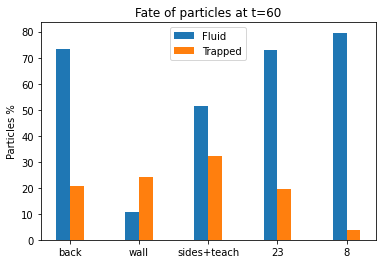

In [17]:
fates = ['Fluid','Trapped']
x = np.arange(len(newtimesmixdict.keys()))
instant = 60
fix,ax,handles,bars = functions.barplot(newtimesmixdict,'Particles %',instant,fates)
ax.set_xticks(x)
ax.set_xticklabels(newtimesmixdict.keys())
ax.set_ylabel('Particles %')
ax.set_title('Fate of particles at t=' + str(instant))
ax.legend()
plt.savefig('mixedbars.pdf')

## Time Evolution plot
## -----------------------------

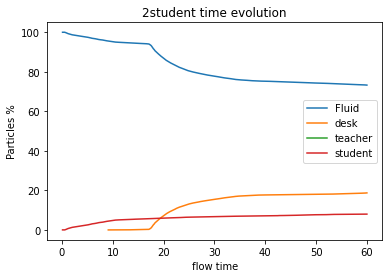

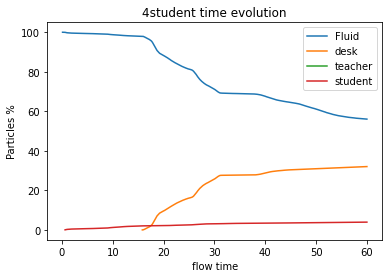

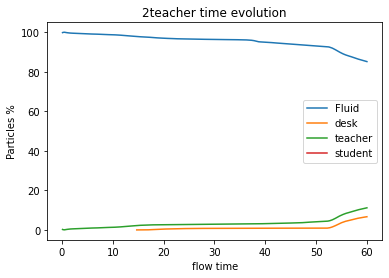

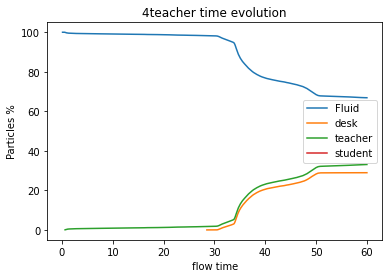

In [7]:
fates = ['Fluid','desk','teacher','student']
functions.plotagainsttime(timesdict,fates)

#### Same for mixed

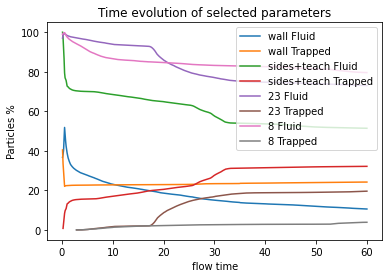

In [7]:
fates = ['Fluid','Trapped']
functions.plotagainsttime(newtimesmixdict,fates,mix=True,savefig=True)
#If you pass mix=False there will be one figure for every key (wall,side+teach,etc)
#If you pass mix=True everything will be plotted in one figure
#savefig=False deactivate list

### Other things

In [ ]:
fates = timesdict['back+teach'].loc[60,'Fate'].append(timesdict['sides+teach'].loc[60,'Fate'],ignore_index=True).drop_duplicates()

In [ ]:
timesdict['front+teach'].index

In [ ]:
column_across_param(timesdict,'Number',60)

# EXAMPLES ON HOW TO ACCESS THE DATA:

In [ ]:
timesdict['sides+teach'].loc[timesdict['sides+teach'].Fate.str.contains(fr"desk",regex=True)]

In [ ]:
massdict['2m'].loc[60]

In [ ]:
totalsdict

In [ ]:
massdict['4m']['Mass %']

In [ ]:
timesdict['2m'].loc[0.6,'Particles %']

### Print several documentations (out of date though)

In [ ]:
print('READ_RESULTS INSTRUCTIONS')
print('----------------------------------------------')
print(read_results.__doc__)
print('-----------------------------------------------')
print('')
print('PERCENTAGE INSTRUCTIONS')
print('----------------------------------------------')
print(percentage.__doc__)
print('-----------------------------------------------')
print('')
print('PLOT AGAINST PARAM INSTRUCTIONS')
print('----------------------------------------------')
print(plotagainstparam.__doc__)
print('MATCHNAMES INSTRUCTIONS')
print('----------------------------------------------')
print(readers.matchnames.__doc__)